In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import random 
import time

$H_0: p = 0,01$ 

$H_1: p > 0,01$

In [2]:
α = 0.05 
p0 = 0.01 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

1.6448536269514722


In [3]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
sample_sizes 

array([  30,   50,  100,  200,  500, 1000])

In [4]:
p1s = np.array( [0.012, 0.015] + list(np.arange(0.02, 0.11, 0.01)) )
p1s 

array([0.012, 0.015, 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 ,
       0.09 , 0.1  ])

In [5]:
st = time.time() 

powers_total = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (100000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 59.07327103614807 seconds


In [6]:
print( 
    len(powers_total), 
    len(sample_sizes), 
    len(p1s) 
)

66 6 11


In [7]:
a = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a += [list(p1s)[i]] * len(sample_sizes)
    
#print(a)
len(a) 

66

In [8]:
b = list(pd.Series(a).round(3))

In [9]:
d1 = {"p1": b, "n": list(sample_sizes) * len(p1s), "power": powers_total}
df1 = pd.DataFrame(d1)
df1

,p1,n,power
0,0.012,30,0.05046
1,0.012,50,0.12343
2,0.012,100,0.11748
3,0.012,200,0.09375
4,0.012,500,0.15281
...,...,...,...
61,0.100,50,0.96564
62,0.100,100,0.99817
63,0.100,200,1.00000
64,0.100,500,1.00000


In [10]:
df1.dtypes 

p1       float64
n          int32
power    float64
dtype: object

In [11]:
df11 = df1
df11["n"] = df11["n"].astype(str)
df11.dtypes 

p1       float64
n         object
power    float64
dtype: object

In [12]:
df111 = df11.pivot_table(values = "power", index = "p1", columns = "n")
df111 

n,100,1000,200,30,50,500
p1,,,,,,
0.012,0.11748,0.15394,0.09375,0.05046,0.12343,0.15281
0.015,0.18965,0.43454,0.18251,0.07418,0.17389,0.33757
0.020,0.32275,0.84616,0.37000,0.12050,0.26636,0.67132
0.030,0.57875,0.99835,0.71689,0.22726,0.44520,0.96472
0.040,0.77039,1.00000,0.90623,0.33798,0.59781,0.99829
0.050,0.88147,1.00000,0.97358,0.44717,0.72170,0.99996
0.060,0.94370,1.00000,0.99368,0.54566,0.80745,1.00000
0.070,0.97344,1.00000,0.99862,0.63124,0.87307,1.00000
0.080,0.98885,1.00000,0.99982,0.70290,0.91710,1.00000


In [13]:
df111 = df111[[str(n) for n in sample_sizes]]
df111 

n,30,50,100,200,500,1000
p1,,,,,,
0.012,0.05046,0.12343,0.11748,0.09375,0.15281,0.15394
0.015,0.07418,0.17389,0.18965,0.18251,0.33757,0.43454
0.020,0.12050,0.26636,0.32275,0.37000,0.67132,0.84616
0.030,0.22726,0.44520,0.57875,0.71689,0.96472,0.99835
0.040,0.33798,0.59781,0.77039,0.90623,0.99829,1.00000
0.050,0.44717,0.72170,0.88147,0.97358,0.99996,1.00000
0.060,0.54566,0.80745,0.94370,0.99368,1.00000,1.00000
0.070,0.63124,0.87307,0.97344,0.99862,1.00000,1.00000
0.080,0.70290,0.91710,0.98885,0.99982,1.00000,1.00000


In [14]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

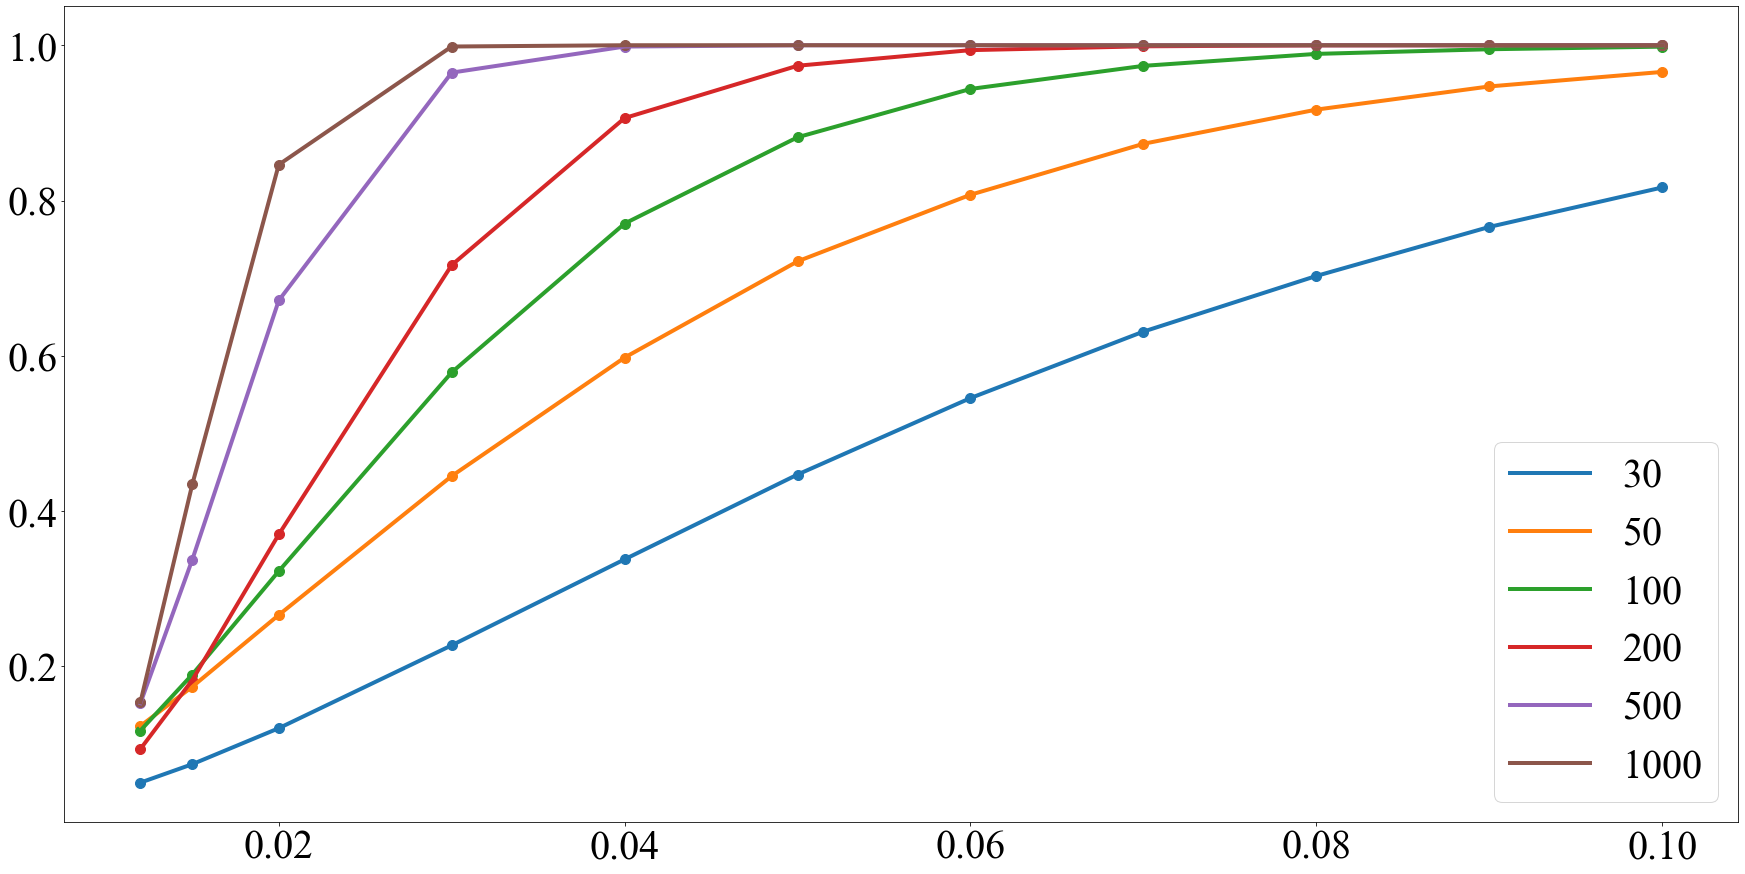

In [15]:
%matplotlib inline

plt.figure(figsize = (30, 15))

for c in df111.columns: 
    plt.scatter(x = df111[c].index, y = df111[c], s = 100)
    plt.plot(df111[c].index, df111[c], "-", label = c, linewidth = 4)

plt.ylim([0, 1.05])
plt.xticks(fontsize = 40) 
plt.yticks(list(np.arange(.2, 1.1, .2)), fontsize = 40)
plt.legend(fontsize = 40)
plt.show() 

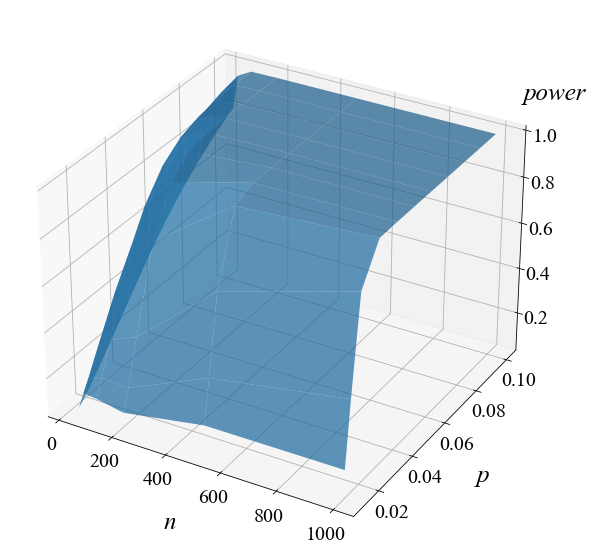

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

# Create a meshgrid of sample sizes and p1 values
n_mesh, p1_mesh = np.meshgrid(sample_sizes, p1s)

# Reshape the powers_total list into the same shape as the meshgrid
powers_mesh = np.array(powers_total).reshape(len(p1s), len(sample_sizes))

# Create a 3D plot
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection = '3d')

# Plot the surface
ax.plot_surface(n_mesh, p1_mesh, powers_mesh, alpha=0.7)

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
#ax.set_title('Power vs Sample Size and p1 Value') 
z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_zticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=20)

# Set the rotation angles
ax.view_init(elev=30, azim=-60)  # Adjust the elevation (elev) and azimuth (azim) angles as desired

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


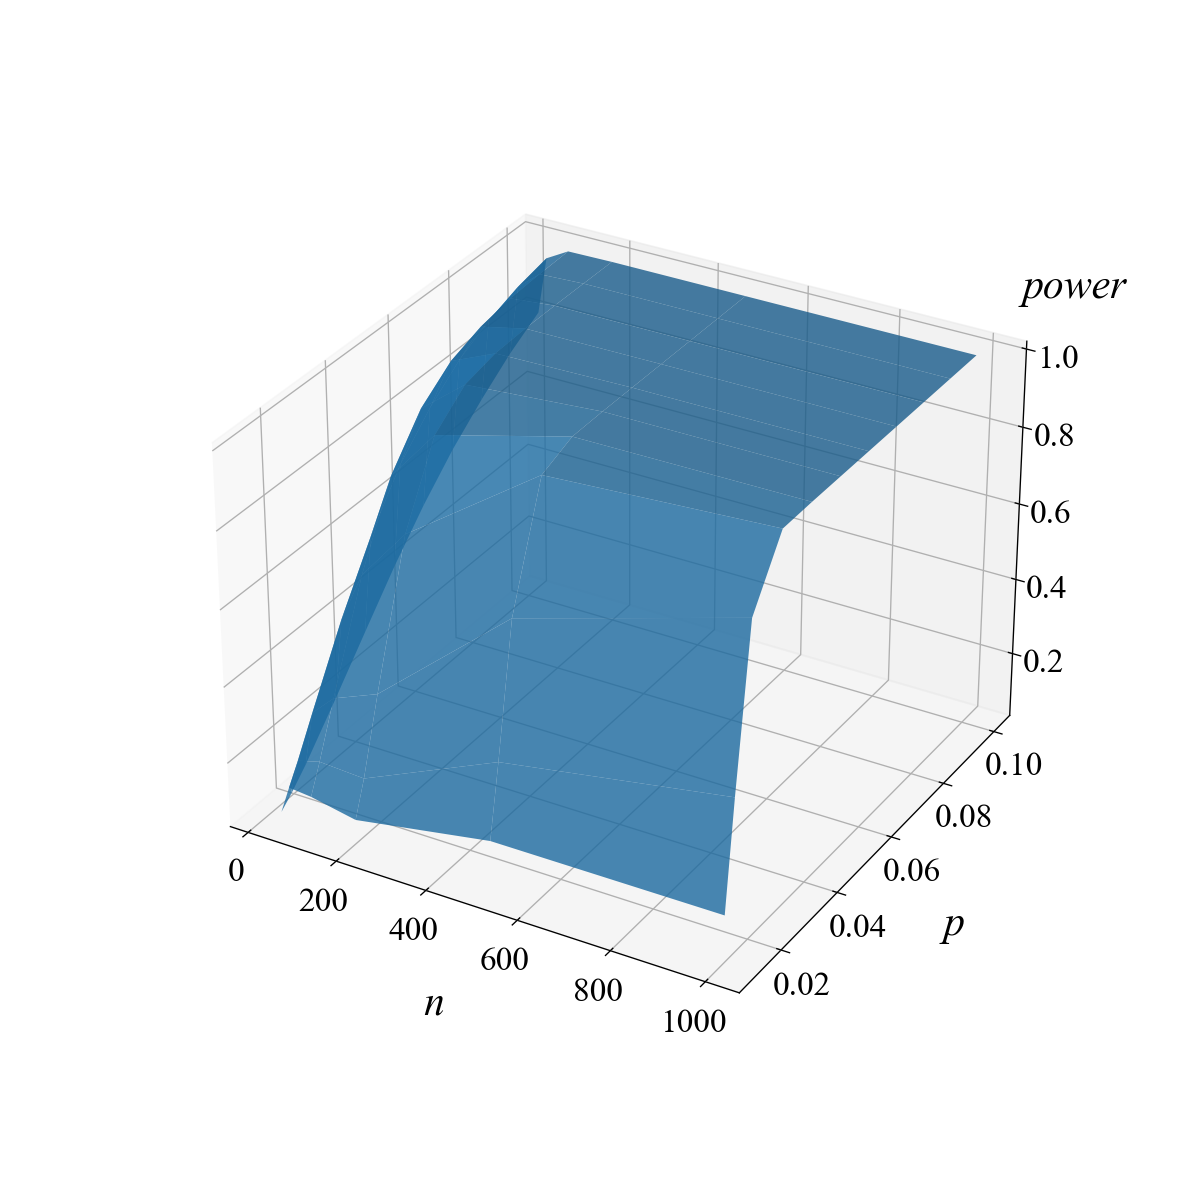

In [17]:
# Import the interactive backend
%matplotlib notebook

# Create a 3D plot
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')

# Plot the surface with transparency
ax.plot_surface(n_mesh, p1_mesh, powers_mesh, alpha = 0.8) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
#ax.set_title('Power vs Sample Size and p1 Value') 
z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_zticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize = 20)

# Show the plot 
plt.show()